Exercise Trending skills

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
from datasets import load_dataset

dataset1 = load_dataset('lukebarousse/data_jobs')
dataf = dataset1['train'].to_pandas()
df = dataf.copy()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\AB\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Nov 25 20:02:42 2024).


In [3]:
df_DS = df[df['job_title_short']=='Data Scientist'].copy()

In [6]:
df_DS['job_posted_month'] = df_DS['job_posted_date'].dt.month

In [9]:
df_DS[['job_title','job_posted_month']]

,job_title,job_posted_month
9,Data Scientist II,4
17,Data Science Team Lead,6
19,Data Scientist,4
20,Data Scientist,1
21,Stage - data scientist – génération ia de donn...,2
...,...,...
785689,Data Scientist -50065385,1
785690,Customer Master Data Specialist,1
785692,Data Scientist- Hybrid Work Location,4
785697,Data Science Python modelling,1


In [35]:
df_DS_explode = df_DS.explode('job_skills')
df_DS_exp_pivot=df_DS_explode.pivot_table(index='job_posted_month',columns='job_skills',aggfunc='size',fill_value=0)

In [54]:
df_DS_exp_pivot.loc['total'] = df_DS_exp_pivot.sum()
df_DS_exp_pivot.loc['mean'] = df_DS_exp_pivot.mean()

In [60]:
df_DS_exp_pivot=df_DS_exp_pivot[df_DS_exp_pivot.loc['total'].sort_values(ascending=False).index]

In [61]:
df_DS_exp_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,workfront,play framework,esquisse,sqlserver,nuxt.js,wimi,shogun,mattermost
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,13998.0,9811.000000,7566.0,3842.000000,3446.0,3253.000000,3222.000000,2582.000000,2316.000000,2132.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,9551.0,6600.000000,5064.0,2644.000000,2566.0,2089.000000,2085.000000,1716.000000,1525.000000,1453.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,9210.0,6374.000000,4971.0,2480.000000,2456.0,2092.000000,1992.000000,1727.000000,1405.000000,1440.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,9135.0,6270.000000,4873.0,2444.000000,2447.0,2055.000000,1905.000000,1665.000000,1546.000000,1456.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,8029.0,5583.000000,4228.0,2244.000000,2271.0,1921.000000,1716.000000,1442.000000,1271.000000,1202.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,9338.0,6473.000000,5019.0,2282.000000,2432.0,2173.000000,2072.000000,1739.000000,1580.000000,1324.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,9400.0,6678.000000,5029.0,2300.000000,2547.0,2207.000000,1972.000000,1845.000000,1535.000000,1425.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,11193.0,8026.000000,6089.0,3100.000000,3013.0,2571.000000,2466.000000,2130.000000,1972.000000,1795.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,8393.0,5748.000000,4153.0,2224.000000,2062.0,1923.000000,1820.000000,1704.000000,1462.000000,1352.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [81]:
df_DS_exp_pivot.reset_index(inplace=True)
df_DS_exp_pivot['job_posted_mon'] = pd.to_datetime(df_DS_exp_pivot['job_posted_month'],format='%m').dt.month_name()
df_DS_exp_pivot.set_index('job_posted_mon',inplace=True)

In [86]:
df_DS_exp_pivot=df_DS_exp_pivot.drop(columns='job_posted_month')

In [88]:
df_DS_exp_pivot

job_skills,python,sql,r,sas,tableau,aws,spark,azure,tensorflow,excel,...,huggingface,fastify,workfront,play framework,esquisse,sqlserver,nuxt.js,wimi,shogun,mattermost
job_posted_mon,,,,,,,,,,,,,,,,,,,,,
January,13998.0,9811.0,7566.0,3842.0,3446.0,3253.0,3222.0,2582.0,2316.0,2132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
February,9551.0,6600.0,5064.0,2644.0,2566.0,2089.0,2085.0,1716.0,1525.0,1453.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
March,9210.0,6374.0,4971.0,2480.0,2456.0,2092.0,1992.0,1727.0,1405.0,1440.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
April,9135.0,6270.0,4873.0,2444.0,2447.0,2055.0,1905.0,1665.0,1546.0,1456.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
May,8029.0,5583.0,4228.0,2244.0,2271.0,1921.0,1716.0,1442.0,1271.0,1202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
June,9338.0,6473.0,5019.0,2282.0,2432.0,2173.0,2072.0,1739.0,1580.0,1324.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
July,9400.0,6678.0,5029.0,2300.0,2547.0,2207.0,1972.0,1845.0,1535.0,1425.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
August,11193.0,8026.0,6089.0,3100.0,3013.0,2571.0,2466.0,2130.0,1972.0,1795.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
September,8393.0,5748.0,4153.0,2224.0,2062.0,1923.0,1820.0,1704.0,1462.0,1352.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: xlabel='job_posted_mon'>

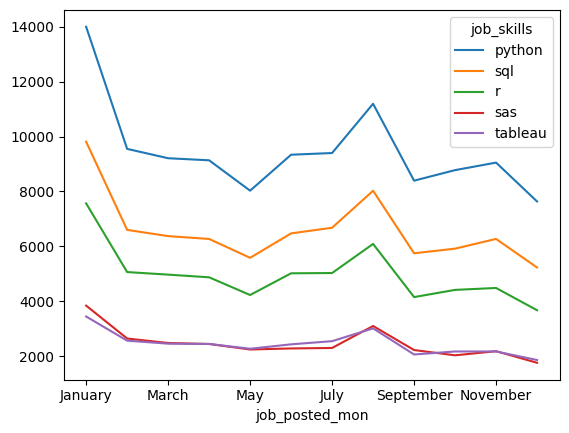

In [87]:
df_DS_exp_pivot.iloc[:,:5].plot(kind='line')